In [1]:
from qiskit import QuantumCircuit,  execute, Aer, BasicAer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np
pi = np.pi
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector

Constructing the QFT matrix using python

In [2]:
# For n qubit system 

n = 4

N = 2**n

w = np.exp(2*pi*(1j)/N)

In [3]:
# Initiliaing the qft matrix and assigning it values

qft = np.zeros((N,N),dtype = 'complex_')

for i in range(N):
    for j in range(N):
        qft[i][j] = pow(w,(i*j))/n

print(qft)

[[ 2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j
   2.50000000e-01+0.00000000e+00j  2.50000000e-01+0.00000000e+00j]
 [ 2.50000000e-01+0.00000000e+00j  2.30969883e-01+9.56708581e-02j
   1.76776695e-01+1.76776695e-01j  9.56708581e-02+2.30969883e-01j
  -5.55111512e-17+2.50000000e-01j -9.56708581e-02+2.30969883e-01j
  -1.76776695e-01+1.76776695e-01j -2.30969883e-01+9.56708581e-02j
  -2.50000000e-01-1.11022302e-16j -2.30969883e-01-9.56708581e-02j
  -1.76776695e-01-1.76776695e-01j -9.56708581e-02-2.30969883e-01j
   1.66533454e-16-2.50000000e-01j  9.56708581e-02-2.30969883e-01j
   1.7677

In [4]:
# Initializing the input state
in_state = np.zeros(N,dtype = 'complex_')

# State |0010> in vector form has third element non zero
in_state[2] = 1j /pow(2, 0.5)

# State |0011> in vector form has fourth element non zero
in_state[3] = 1 /pow(2, 0.5)

#print(in_state)


# Output state

out_state = np.matmul(qft, in_state)

# Making a state_vector 
matrix_output = Statevector(out_state, dims=(2, 2, 2, 2))

print(out_state)

# Checking if output state is normalized

norm = pow(np.matmul(out_state.conjugate(), out_state), 0.5)
print("Norm = ", norm)

[ 1.76776695e-01+0.1767767j  -5.73504875e-02+0.28832037j
 -3.01776695e-01+0.125j      -2.88320371e-01-0.19264951j
  1.96261557e-16-0.35355339j  2.88320371e-01-0.19264951j
  3.01776695e-01+0.125j       5.73504875e-02+0.28832037j
 -1.76776695e-01+0.1767767j  -1.92649513e-01-0.03832037j
 -5.17766953e-02-0.125j       3.83203706e-02-0.05735049j
 -1.17756934e-16+0.j         -3.83203706e-02-0.05735049j
  5.17766953e-02-0.125j       1.92649513e-01-0.03832037j]
Norm =  (0.9999999999999999+0j)


Making the quantum circuit for Quantum fourier transform of size n

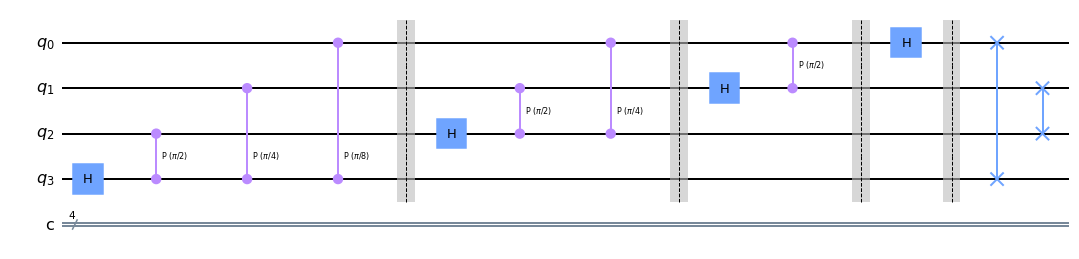

In [5]:

n=4
qftn=QuantumCircuit(n,n,name='QFT')


for i in range(n-1,-1,-1):
    # Puttign each qubit in unifrom superposition
    qftn.h(i)
    
    # Adding the relevent rotation gate
    p=0
    for j in range(i):
        p+=1
        qftn.cp(pi/(2**(p)),i-j-1,i) 
    qftn.barrier()

# Swapping the output qubits
for i in range(int(n/2)):
    qftn.swap(i,n-1-i)

qftn.draw('mpl')
        

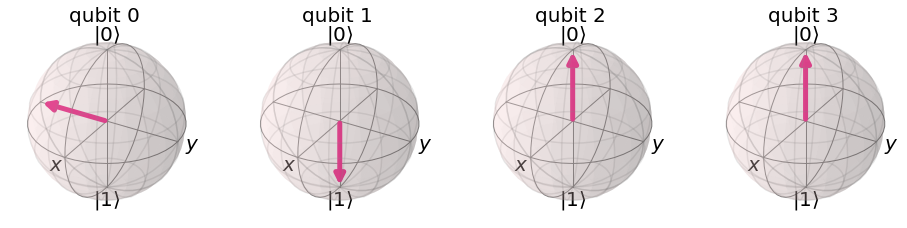

In [6]:
# Perparing the inout state for the quntum circuit
sv1 = Statevector.from_label('0011')
sv2 = Statevector.from_label('0010')

sv = (sv1 + 1j* sv2)/pow(2,0.5) 
# Representing the input state on the block sphere
plot_bloch_multivector(sv)


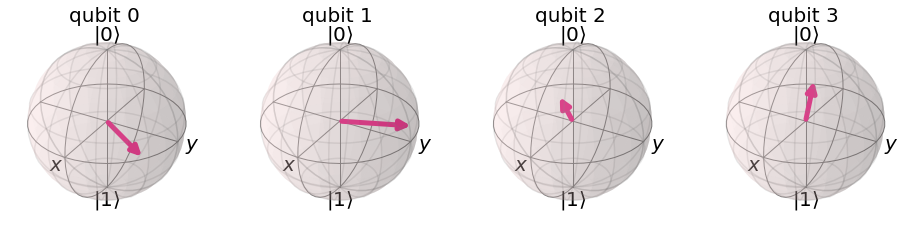

In [7]:
# Evolovinf the state and representing the output state on the block sphere
circuit_output = sv.evolve(qftn)
plot_bloch_multivector(circuit_output)

In [8]:
# Verifying that the circuit and matrix give the same results
#print(matrix_output)
#print(circuit_output)

fidelity = state_fidelity(matrix_output, circuit_output)

print("Fidelity =", fidelity)

Fidelity = 0.9999999999999991


Hence, the quantum circuit we have constructed and the matrix we have made are equivalent, atleast for the input we have used. We can alterantively, make the matrix for this cirucit (refer to Q1 for GHZ) and compare the elements of the matrix.

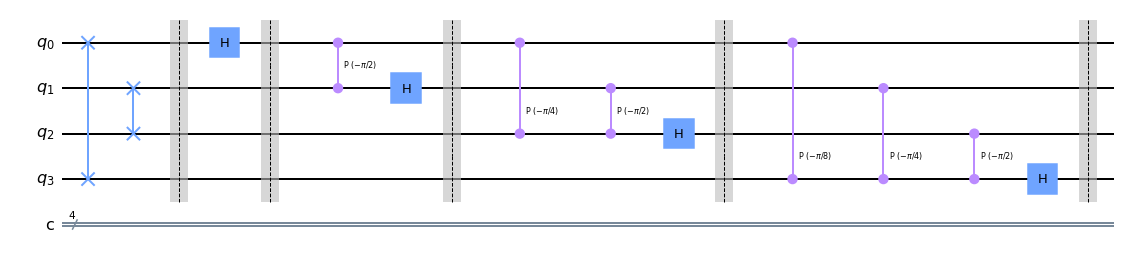

In [9]:
# The QFT inverse circuit
n=4
iqftn=QuantumCircuit(n,n,name='IQFT')

for i in range(int(n/2)):
    iqftn.swap(i,n-1-i)

iqftn.barrier()

for i in range(n):
    p=i+1
    for j in range(i):
        p-=1
        iqftn.cp(-pi/(2**(p)),j,i)
    iqftn.h(i)
    iqftn.barrier()

iqftn.draw('mpl')